<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
step3 : market study
</font>
</h1>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the preprocessed dataset
df = pd.read_csv("preprocessed_sales.csv")
df

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


we want create scatter plot for countries sell and customer counts:

first we want divide countries to four group by third quartile of sell and customer count


<p style="text-align:center;"><img src="output.png"></p>

<table dir=rtl align = center>

<tr>
<th><font face="vazir" size=3>Feature</th>
<th><font face="vazir" size=3>value</th>
</tr>

<tr>
<td><font face="vazir" size=3>fig size</td>
<td><font face="vazir" size=3>10 *10</td>
</tr>

<tr>
<td><font face="vazir" size=3>first group color</td>
<td><font face="vazir" size=3>red</td>
</tr>

<tr>
<td><font face="vazir" size=3>second group color</td>
<td><font face="vazir" size=3>blue</td>
</tr>

<tr>
<td><font face="vazir" size=3>third group color</td>
<td><font face="vazir" size=3>green</td>
</tr>

<tr>
<td><font face="vazir" size=3>fourth group color</td>
<td><font face="vazir" size=3>cyan</td>
</tr>

<tr>
<td><font face="vazir" size=3>title font size</td>
<td><font face="vazir" size=3>18</td>
</tr>

<tr>
<td><font face="vazir" size=3>axes font size</td>
<td><font face="vazir" size=3>16</td>
</tr>

<tr>
<td><font face="vazir" size=3>point size</td>
<td><font face="vazir" size=3>20</td>
</tr>

<tr>
<td><font face="vazir" size=3>style</td>
<td><font face="vazir" size=3>fivethirtyeight</td>
</tr>

</table>
<br>

<table dir=rtl align = center>

<tr>
<th><font face="vazir" size=3>legend</th>
<th><font face="vazir" size=3>value</th>
</tr>

<tr>
<td><font face="vazir" size=3>facecolor color</td>
<td><font face="vazir" size=3>silver</td>
</tr>

<tr>
<td><font face="vazir" size=3>title font size</td>
<td><font face="vazir" size=3>16</td>
</tr>

<tr>
<td><font face="vazir" size=3>text font size</td>
<td><font face="vazir" size=3>14</td>
</tr>

</table>

In [3]:
# prepare the dataframe
df_outUK= df.drop(df[df["Country"]=="United Kingdom"].index)
df_outUK["TotalPrice"] = df_outUK["UnitPrice"]*df_outUK["Quantity"]
country_df = pd.DataFrame(df_outUK.groupby("Country")["TotalPrice"].sum())
country_df["CustomerCount"]= df_outUK.drop_duplicates("CustomerId").groupby("Country")["CustomerId"].count()
country_df.drop("Unspecified", inplace=True)
# df_outUK

In [4]:
totalPriceQ3= country_df["TotalPrice"].quantile(0.75)
customerCountQ3 = country_df["CustomerCount"].quantile(0.75)
country_df["Group"]=[0]*country_df.shape[0]
# [0]*10
country_df.loc[(country_df["CustomerCount"]<customerCountQ3) & (country_df["TotalPrice"]<totalPriceQ3) ,"Group"]=4
country_df.loc[(country_df["CustomerCount"]>customerCountQ3) & (country_df["TotalPrice"]<totalPriceQ3) ,"Group"]=3
country_df.loc[(country_df["CustomerCount"]<customerCountQ3) & (country_df["TotalPrice"]>totalPriceQ3) ,"Group"]=2
country_df.loc[(country_df["CustomerCount"]>customerCountQ3) & (country_df["TotalPrice"]>totalPriceQ3) ,"Group"]=1


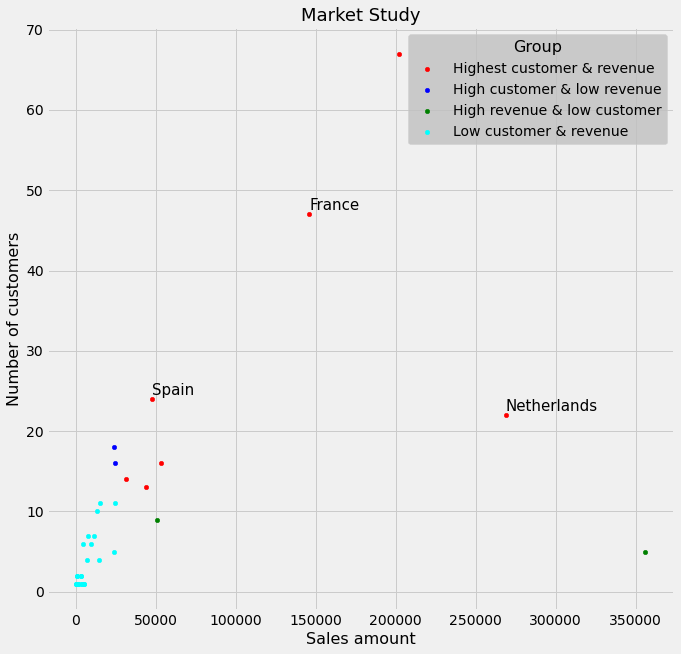

In [10]:
# plot

fig , ax = plt.subplots(figsize=(10,10))
plt.style.use("fivethirtyeight")

country_df[country_df["Group"]==1].plot(kind= "scatter" ,ax=ax, x="TotalPrice" , y="CustomerCount",s=20,color="red")
country_df[country_df["Group"]==3].plot(kind= "scatter" ,ax=ax, x="TotalPrice" , y="CustomerCount",s=20,color="blue")
country_df[country_df["Group"]==2].plot(kind= "scatter" ,ax=ax, x="TotalPrice" , y="CustomerCount",s=20,color="green")
country_df[country_df["Group"]==4].plot(kind= "scatter" ,ax=ax, x="TotalPrice" , y="CustomerCount",s=20,color="cyan")
ax.set_xlabel("Sales amount", fontsize=16)
ax.set_ylabel("Number of customers" , fontsize=16)
ax.set_title("Market Study",fontsize=18)

ax.legend(["Highest customer & revenue","High customer & low revenue","High revenue & low customer","Low customer & revenue"]\
           ,title="Group", title_fontsize = 16 , fontsize=14 , facecolor="silver" , frameon=True)


ax.text(country_df.loc["Spain","TotalPrice"], (country_df.loc["Spain","CustomerCount"]+0.5) ,"Spain" , fontsize=15)
ax.text(country_df.loc["France","TotalPrice"], (country_df.loc["France","CustomerCount"]+0.5) ,"France" , fontsize=15)
ax.text(country_df.loc["Netherlands","TotalPrice"], (country_df.loc["Netherlands","CustomerCount"]+0.5) ,"Netherlands" , fontsize=15);
